# Klasifikacija korišćenjem K najbližih suseda

In [1]:
# Ucitavanje preprocesiranih podataka
import pandas as pd
X_train = pd.read_csv('./data/X_train_scaled.csv')
X_test = pd.read_csv('./data/X_test_scaled.csv')
y_train = pd.read_csv('./data/y_train_scaled.csv')
y_test = pd.read_csv('./data/y_test_scaled.csv')

In [5]:
# TODO: obraditi autlajere
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
knn = KNeighborsClassifier()
knn.fit(X_train, np.ravel(y_train))
y_knn = knn.predict(X_test)

In [6]:
from helpers import report
report(y_test, y_knn)

Tačnost: 0.6341059602649006
Izvestaj:
              precision    recall  f1-score   support

           0       0.67      0.77      0.71       360
           1       0.56      0.44      0.49       244

    accuracy                           0.63       604
   macro avg       0.61      0.60      0.60       604
weighted avg       0.62      0.63      0.62       604

Matrica konfuzije:
     0    1
0  276   84
1  137  107


In [9]:
# Podesavanje hiper parameteara
from sklearn.model_selection import GridSearchCV

params_grid = {
    'n_neighbors': range(10, 50, 5),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

gscv = GridSearchCV(KNeighborsClassifier(), params_grid, cv=6, verbose=4)
gscv.fit(X_train, np.ravel(y_train))

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.651 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.617 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.651 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.667 total time=   0.0s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.611 total time=   0.0s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.660 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.664 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.628 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.667 total time=   0.0s
[CV 6/6] END n_neigh

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(10, 50, 5), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=4)

In [10]:
gscv.best_params_

{'n_neighbors': 20, 'p': 1, 'weights': 'distance'}

In [11]:
gscv.best_score_

0.6567254652361035

In [12]:
y_gscv = gscv.predict(X_test)

In [13]:
report(y_test, y_gscv)

Tačnost: 0.6506622516556292
Izvestaj:
              precision    recall  f1-score   support

           0       0.65      0.90      0.75       360
           1       0.66      0.28      0.40       244

    accuracy                           0.65       604
   macro avg       0.65      0.59      0.57       604
weighted avg       0.65      0.65      0.61       604

Matrica konfuzije:
     0   1
0  324  36
1  175  69


In [15]:
# Ansambli
from sklearn.ensemble import BaggingClassifier

baggingKnn = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=20)
baggingKnn.fit(X_train, np.ravel(y_train))

y_bknn = baggingKnn.predict(X_test)
report(y_test, y_bknn)    

Tačnost: 0.6456953642384106
Izvestaj:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       360
           1       0.59      0.41      0.49       244

    accuracy                           0.65       604
   macro avg       0.63      0.61      0.61       604
weighted avg       0.64      0.65      0.63       604

Matrica konfuzije:
     0    1
0  289   71
1  143  101


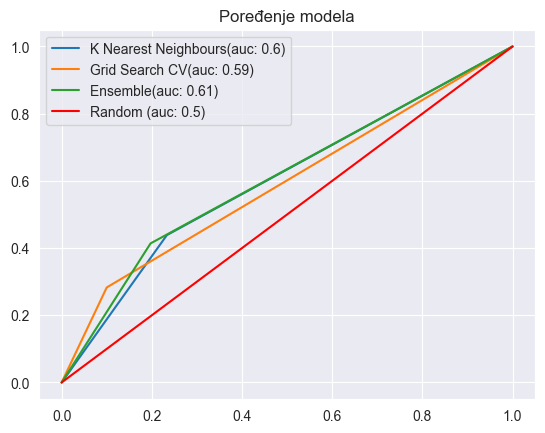

In [16]:
# Poredjenje
from helpers import print_roc_curve

models = {
    'K Nearest Neighbours': knn,
    'Grid Search CV': gscv,
    'Ensemble': baggingKnn,
}

print_roc_curve(models, X_test, y_test)